In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
assert os.path.basename(os.getcwd()) == "element-moseq", (
    "Please move to the " + "element directory"
)

In [2]:
import datajoint as dj
from pathlib import Path

In [6]:
from tutorial_pipeline import lab, subject, session, pca, model, Device

[2024-01-02 08:32:38,675][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.


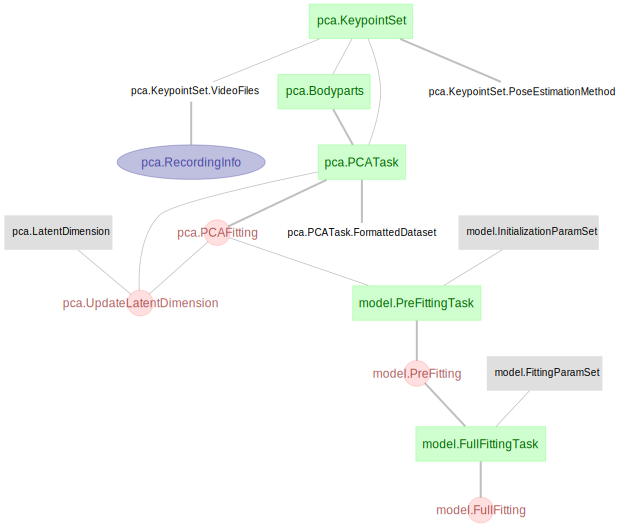

In [9]:
dj.Diagram(pca) + dj.Diagram(model)

In [10]:
pca.KeypointSet()

subject,session_datetime,kpset_id,kpset_path Path relative to root data directory where the videos and their keypoints are located.,kpset_description Optional. User-entered description.


In [11]:
# Subject and Session tables
subject.Subject.insert1(
    dict(
        subject="subject1",
        sex="F",
        subject_birth_date="2020-01-01",
        subject_description="test",
    ),
    skip_duplicates=True,
)

#Definition of the dictionary named "session_keys"
session_keys = [
    dict(subject="subject1", session_datetime="2021-06-02 14:04:22"),
    dict(subject="subject1", session_datetime="2021-06-03 14:43:10"),
]

#Insert this dictionary in the Session table
session.Session.insert(session_keys, skip_duplicates=True)

In [12]:
kpset_key = dict(subject="subject1",
            session_datetime="2021-06-02 14:04:22",
            kpset_id=1)
pca.KeypointSet.insert1({**kpset_key, 
                            "kpset_path":"/input_data/videos",
                            "kpset_description":"testing pca schema"},
                            skip_duplicates=True)

In [13]:
pca.KeypointSet()

subject,session_datetime,kpset_id,kpset_path Path relative to root data directory where the videos and their keypoints are located.,kpset_description Optional. User-entered description.
subject1,2021-06-02 14:04:22,1,/input_data/videos,testing pca schema


In [14]:
video_files = ["/input_data/videos/21_11_8_one_mouse.top.ir.Mp4",
               "/input_data/videos/21_12_2_def6a_1.top.ir.mp4",
               "/input_data/videos/21_12_2_def6b_2.top.ir.mp4"]

pca.KeypointSet.VideoFiles.insert(
    ({**kpset_key, "video_id":v_idx, "video_path":Path(f)}
    for v_idx, f in enumerate(video_files)),
    skip_duplicates=True
)

In [15]:
pca.KeypointSet.VideoFiles()

subject,session_datetime,kpset_id,video_id,"video_path Filepath of each video, relative to root data directory"
subject1,2021-06-02 14:04:22,1,0,/input_data/videos/21_11_8_one_mouse.top.ir.Mp4
subject1,2021-06-02 14:04:22,1,1,/input_data/videos/21_12_2_def6a_1.top.ir.mp4
subject1,2021-06-02 14:04:22,1,2,/input_data/videos/21_12_2_def6b_2.top.ir.mp4


In [16]:
pca.KeypointSet.PoseEstimationMethod.insert1(
    {**kpset_key,
     "format":"deeplabcut",
     "extension":"h5",
     "device":"Camera1"},
     skip_duplicates=True
)

In [17]:
pca.KeypointSet.PoseEstimationMethod()

subject,session_datetime,kpset_id,"format deeplabcut, sleap","extension h5, csv",device
subject1,2021-06-02 14:04:22,1,deeplabcut,h5,Camera1


In [18]:
# pca.RecordingInfo.populate()

In [19]:
pca.Bodyparts()

subject,session_datetime,kpset_id,bodyparts_id,anterior_bodyparts list of strings of anterior bodyparts,posterior_bodyparts list of strings of posterior bodyparts,use_bodyparts list of strings of bodyparts to be used


In [20]:
# Insert data in PCAInfo table
bodypart_key = {**kpset_key,
                "bodyparts_id":1}
pca.Bodyparts.insert1({**bodypart_key,
                "anterior_bodyparts":"nose",
                "posterior_bodyparts":"spine4",
                "use_bodyparts":['spine4', 'spine3', 'spine2', 'spine1',
                'head', 'nose', 'right ear', 'left ear']},
                    skip_duplicates=True)



In [22]:
pca.PCATask()


subject,session_datetime,kpset_id,bodyparts_id,project_path KPMS's project_path in config relative to root,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"


In [23]:
pca.PCATask.insert1({**bodypart_key,
                             "project_path":"/kpms_project",
                            "task_mode":"load"},
                            skip_duplicates=True)

In [24]:
pca.PCATask()

subject,session_datetime,kpset_id,bodyparts_id,project_path KPMS's project_path in config relative to root,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"
subject1,2021-06-02 14:04:22,1,1,/kpms_project,load


In [25]:
pca.PCATask.generate(bodypart_key)

FileNotFoundError: No valid full-path found (from ['/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox', PosixPath('/Users/milagros/Documents/datajoint-elements/element-moseq/data/outbox')]) for /input_data/videos

In [26]:
pca.PCATask.FormattedDataset()

subject,session_datetime,kpset_id,bodyparts_id,config stored full config file,coordinates,confidences,bodyparts,data,metadata


In [27]:
pca.PCAFitting()

subject,session_datetime,kpset_id,bodyparts_id,pca_fitting_time Time of generation of the PCA fitting analysis,pca


In [28]:
pca.LatentDimension()

latent_dim,latent_dim_description
